In [1]:
# Following preamble is not necessary if you are using jupyter notebook
#import sys
#sys.path.append('./')
from time import time
import numpy as np
import matplotlib.pyplot as plt

## 1 Importing the home-made package `NSBH`

Import *home-made* python package `NSBH` for calculating the fate of a nearby old neutron star (NS) when there are dark matter (DM) particles being captured inside it. The method is based on J. Bramante *et al*., *Phys. Rev. D* **89**, 015010 (2014). Please put your python scripts or jupyter notebooks and the package container `nsbh` in the same folder.

### 1.1 Prerequisites

To load `NSBH` properly, the follwing third-party packages are required:

- `numpy`
- `scipy`

### 1.2 Issues
In order to incorporate the package folder properly, if you are using spyder/vscode/pycharm...etc text editors instead of jupyter notebook, please add the following *preamble* to the python script:.<br>
`import sys`<br>
`sys.path.append(./)`

In [2]:
# Please use 'from' instead of 'import' in the beginning to load the package
# Otherwise, the namespace will be a mess
from nsbh import * 

## 2 Introduction on the `NSBH`

### 2.1 Number of DM being captured

The number of DM being captured by the NS can be calculated through the function `numx`$\leftarrow t,m_\chi,\sigma_{\chi n},\rho_\chi,\bar{v}_\chi,\tau$.

The inputs $t$ is the age of NS in seconds, $m_\chi$ the DM mass in GeV, $\sigma_{\chi n}$ the DM-neutron cross section in ${\rm cm}^2$, $\rho_\chi$ the DM local density (default $0.3\,{\rm GeV\,cm}^{-3}$), $\bar{v}_\chi$ the DM velocity dispersion (default $220\,{\rm km\,s}^{-1}$) and $\tau_\chi$ the DM lifetime in seconds (default `None`). Note that when $\tau_\chi$ is `None` it indicates DM does not decay.

In [3]:
age = 3e17     # NS age
mx = 0.5       # DM mass
sigxn = 1e-45  # DM-neutron cross section

In [4]:
# Calculating DM number
numx(age,mx,sigxn)

1.1279651370085729e+42

In [5]:
# Draw a plot of age vs DM number with decay
tau = 3.1e17  # DM lifetime, set to the age of the Universe
age_ls = np.linspace(10,20,201)
nx_ls = []
for age in age_ls:
    dm_num = numx(10**age,mx,sigxn,tau=tau)
    nx_ls.append(dm_num)

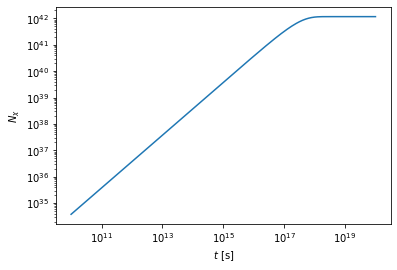

In [6]:
plt.plot(10**age_ls,nx_ls)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [s]')
plt.ylabel('$N_\chi$')
plt.show()

### 2.2 DM capture rate

The capture rate (# per second) can be calculated throguh `caprate`$\leftarrow m_\chi,\sigma_{\chi n}, \rho_\chi,\bar{v}_\chi$.

The meanings of the inputs are identical to `numx`. In addition, if you want to calculate the capture rate without full consideration of Pauli blocking effect, it can be done by the function `caprate_no`. The inputs are the same as `caprate`.

In [7]:
# Calculating capture rate
caprate(mx,sigxn)

3.7598837900285764e+24

In [8]:
# Without full Pauli blocking effect in consideration
caprate_no(mx,sigxn)

5.442643316363636e+24

In [9]:
# Draw a plot of mass vs capture rate
mx_ls = np.linspace(-6,2,101)
cap_ls = []
for m in mx_ls:
    cap_rate = caprate(10**m,sigxn)
    cap_ls.append(cap_rate)

# no full Pauli blocking correction
cap_no_pauli_ls = []
for m in mx_ls:
    cap_no_rate = caprate_no(10**m,sigxn)
    cap_no_pauli_ls.append(cap_no_rate)

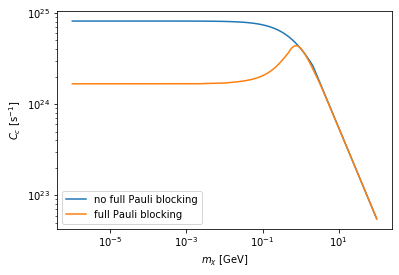

In [10]:
plt.plot(10**mx_ls,cap_no_pauli_ls,label='no full Pauli blocking')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [GeV]')
plt.ylabel('$C_c$ [s$^{-1}$]')

plt.plot(10**mx_ls,cap_ls,label='full Pauli blocking')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$m_\chi$ [GeV]')
plt.ylabel('$C_c$ [s$^{-1}$]')

plt.legend(loc='lower left')
plt.show()

### 2.3 Star consumig criteria

To determine the fate of the nearby old NS in the presence of DM with Yukawa potential, using `star_consumed`$\leftarrow m_\chi, N_\chi, m_\phi, \alpha_\chi$.

$N_\chi$ is the DM number and can be pre-calculated by `numx`, $m_\phi$ the mediator mass in MeV and $\alpha_\chi$ the dark fine-structure constant. The function will return a tuple with 1st a boolean value and 2nd a string.

In [11]:
mphi = 10  # mediator mass
a = 1e-2   # dark fine-structure constant

In [12]:
star_consumed(mx,
            numx(age,mx,sigxn),
            mphi,a)

(False, 'Scenario (c)')

The 1st value `False` indicated the inputs will not lead to the destruction of the NS after `age`$=3\times10^{17}\,{\rm s}$. The 2nd string `'Scenario (c)'` indicated the process terminated at which state. Please check `decision_tree.pdf` for the meaning of the Scenario.